In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

post_df_full = pd.read_csv("C:/FinalProject/DoraemonVN.csv")

#### Sum comments

In [241]:
x = post_df_full["comments"].sum()
print("Tổng số comments là :",x)

Tổng số comments là : 29547


#### Filter comments

In [225]:
post_cmt = post_df_full["comments_full"].tolist()

In [226]:
arr = []
for i in range(len(post_cmt)):
    post_cmt[i] = post_cmt[i].replace("[","")
    post_cmt[i] = post_cmt[i].replace("]","")

    input_str = post_cmt[i]

    # Xóa dấu ngoặc đối với các thành phần và chia chuỗi thành một danh sách
    list_result = [item.strip('{}').split(',') for item in input_str.split('}, {')]

    arr.append(list_result)


In [227]:
list_cmt = []
for i in range(len(arr)) : 
    ss = ""
    for j in range(len(arr[i])) :
        if len(arr[i][j]) > 6:
            modified_str = arr[i][j][6].replace(":", "")
            ss = ss + modified_str + "\n"
    list_cmt.append(ss)
    

In [228]:
for i in range(len(list_cmt)) :
    list_cmt[i] = list_cmt[i].replace("comment_text","")
    list_cmt[i] = list_cmt[i].replace("'","")
    

#### Comments have been cleaned up

In [234]:
list_cmt

['  vẫn mãi một tình yêu bất diệt ❤️❤️\n  vẫn yêu nhé\n  Tất nhiên r\n  Yêu rất nhiều 😍\n  Yêu yêuuu ngày nào cũng xem ❤️\n  Ra tập mới nhiều đê…canh qài hk có tập mới…toàn đổi qa coi Conan đỡ 😑😑\n  Mãi iuuu3🌷✨\n  Càng ngày càng iuuuu\n  Yêu suốt kiếp 😙\n  tất nhiên rồi\n  Ỏooo iu hơn lun á 🌸🌸🌸\n  Yêu hơn. Phim càng ngày càng hay \n  moãi moãi ó😘😘😘\n  Vẫn xem mỗi ngày 😆😆😆\n  always ...\n  Yêu bée\n  Xem em nó từ lúc 4 tuổi đến bây giờ 33\n  Mãi iu 🥰\n  mãi êu😘😘😘\n  MÃI IU <3\n  Tuổi thơ của tui sao mà k iu cho dc\n  Người ta không phải là chồn\n  càng ngày càng iu\n  💜\n  Yêu nó suốt 30 năm qua rồi đấy!!!\n  ❤️\n  ❤️\n  Khánh Toàn Hợp Khuất yêu khum? 🐧\n  Diep Nguyen\n  Hi\n',
 '  Chai kô mlem thế\n  Nguyễn Quỳnh Nga v cả doremon =))))\n  Ơ nhóm này cũng lên Quan tài 9 Long à? )\n  Suneo giống Guile nhể\n  Tạ Thùy Dương t nghe nói m hay vẽ ntn ?\n',
 '  Hồi đọc khúc đầu cũng tò mò coi định mệnh đời ổng là ai\n  Hẳn là mắt to tròn ))))\n  Lúc đó mắt ổng đeo filter )))\n  Cảm lạnh ))\

#### Wordcloud of comments

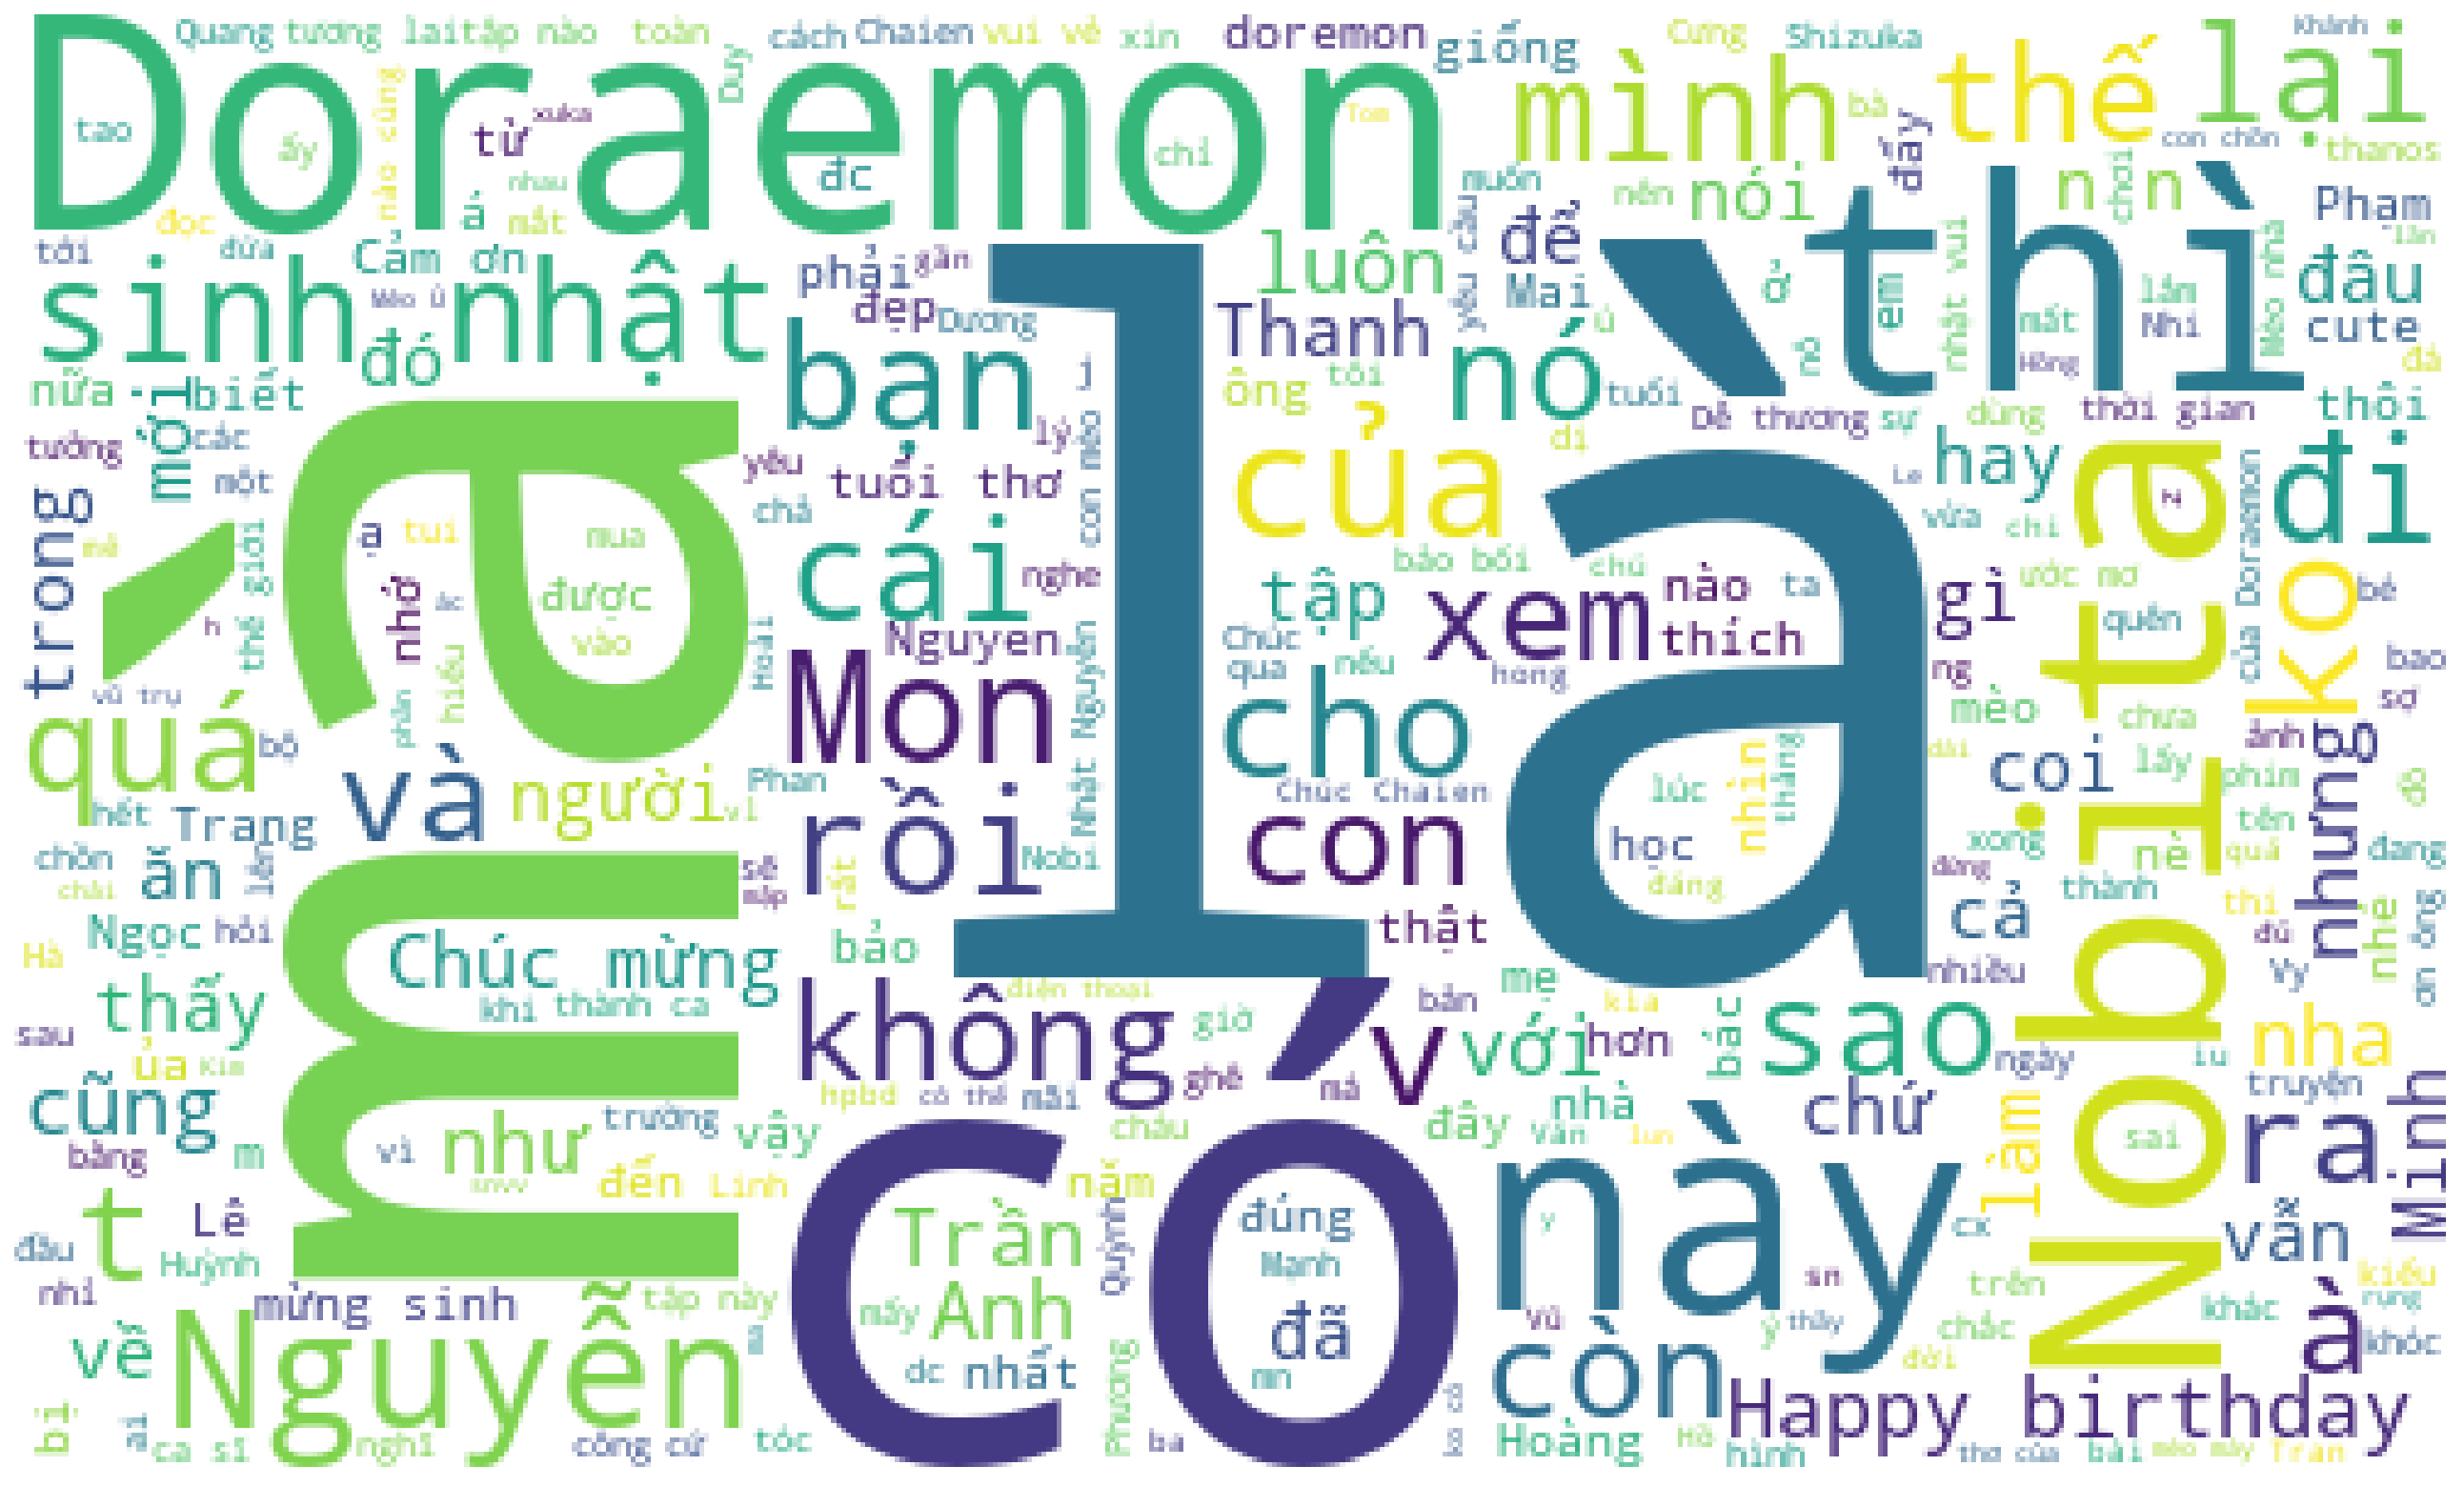

In [238]:
text = "\n".join(list_cmt)
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Comments emotions

In [243]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Tải dữ liệu cho việc phân tích cảm xúc
nltk.download('vader_lexicon')

# Khởi tạo đối tượng SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Phân tích cảm xúc
sentiment_scores = sid.polarity_scores(text)

# In kết quả
print(sentiment_scores)

# Xác định là tích cực, tiêu cực, hay trung tính dựa trên điểm số
if sentiment_scores['compound'] >= 0.05:
    print("Bình luận của các bài viết mang hướng tích cực")
elif sentiment_scores['compound'] <= -0.05:
    print("Bình luận của các bài viết mang hướng tiêu cực")
else:
    print("Bình luận của các bài viết mang hướng trung tính")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FPT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.007, 'neu': 0.968, 'pos': 0.026, 'compound': 0.9999}
Bình luận của các bài viết mang hướng tích cực
